# 富士山から下りたい

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("mtfuji_data.csv",delimiter=",", skiprows=1)

In [15]:
print(fuji)
print(fuji.shape)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]
(300, 5)


(0.0, 322.0)

【問題1】断面図の作成

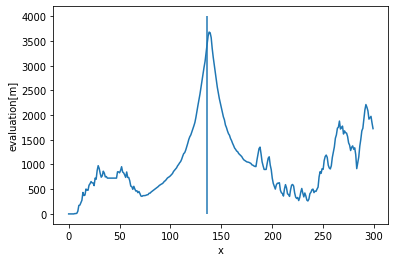

In [23]:
plt.xlabel('x')
plt.ylabel('evaluation[m]')
plt.vlines(136, 0, 4000)
plt.plot(fuji[0:, 0], fuji[0:, 3])
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [50]:
def compute_grad(x):
    grad = (fuji[x, 3] - fuji[x-1, 3]) / (fuji[x, 0] - fuji[x-1, 0])
    return grad

point = int(input('今いる地点を入力してください:'))
y = compute_grad(point)
print('勾配：{}'.format(y))

今いる地点を入力してください:250
勾配：-14.349999999999909


【問題3】移動先の地点を計算する関数を作成

In [117]:
alpha = 0.2
def compute_grad3(x):
    grad = (fuji[x, 3] - fuji[x-1, 3]) / (fuji[x, 0] - fuji[x-1, 0])
    point = fuji[x, 0] - alpha * grad
    if point < 0 or point > 300:
        print('存在しない地点です。移動距離か地点を選び直してください。')
    else:
        return int(point)

point = int(input('今いる地点を入力してください:'))
y = compute_grad3(point)
print(' 移動先は{}です'.format(y))

今いる地点を入力してください:111
 移動先は101です


【問題4】山を下る関数を作成

In [135]:
# alpha = 0.001
def compute_grad4(x, alpha=0.05):
    check_point = []
    check_point.append(x)
    while True:
        grad = (fuji[x, 3] - fuji[x-1, 3]) / (fuji[x, 0] - fuji[x-1, 0])
        point = fuji[x, 0] - alpha * grad
        point = int(point)
#         print(point)
        if point < 0 or point > 300:
            print('存在しない地点です。移動距離(学習率)か地点を選び直してください。')
            break
        else:
            x = point
            if point == check_point[-1]:
                break
            else:
                check_point.append(point)
        
    return check_point

point = int(input('今いる地点を入力してください:'))
result4 = compute_grad4(point)
print(' 移動履歴:', result4)

今いる地点を入力してください:136
 移動履歴: [136, 127, 120, 118, 114, 112, 108, 106, 104, 102, 100, 99, 98, 97, 95, 94, 92, 91, 90, 89, 87, 86, 85, 84, 83, 82, 81, 79, 77, 76, 75, 74, 73, 72]


【問題5】下山過程の可視化

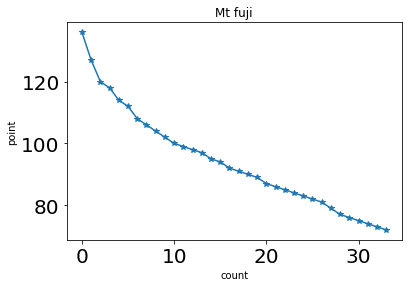

In [136]:
plt.title('Mt fuji')
plt.xlabel("count")
plt.ylabel("point")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(result4, marker='*')
plt.show()

【問題6】初期値の変更

In [139]:
log = []
# print(len(fuji))
for i in range(len(fuji)):
    print('{}回目'.format(i))
    y = compute_grad4(i, alpha=0.001)
    log.append(y)

0回目
1回目
2回目
3回目
4回目
5回目
6回目
7回目
8回目
9回目
10回目
11回目
12回目
13回目
14回目
15回目
16回目
17回目
18回目
19回目
20回目
21回目
22回目
23回目
24回目
25回目
26回目
27回目
28回目
29回目
30回目
31回目
32回目
33回目
34回目
35回目
36回目
37回目
38回目
39回目
40回目
41回目
42回目
43回目
44回目
45回目
46回目
47回目
48回目
49回目
50回目
51回目
52回目
53回目
54回目
55回目
56回目
57回目
58回目
59回目
60回目
61回目
62回目
63回目
64回目
65回目
66回目
67回目
68回目
69回目
70回目
71回目
72回目
73回目
74回目
75回目
76回目
77回目
78回目
79回目
80回目
81回目
82回目
83回目
84回目
85回目
86回目
87回目
88回目
89回目
90回目
91回目
92回目
93回目
94回目
95回目
96回目
97回目
98回目
99回目
100回目
101回目
102回目
103回目
104回目
105回目
106回目
107回目
108回目
109回目
110回目
111回目
112回目
113回目
114回目
115回目
116回目
117回目
118回目
119回目
120回目
121回目
122回目
123回目
124回目
125回目
126回目
127回目
128回目
129回目
130回目
131回目
132回目
133回目
134回目
135回目
136回目
137回目
138回目
139回目
140回目
141回目
142回目
143回目
144回目
145回目
146回目
147回目
148回目
149回目
150回目
151回目
152回目
153回目
154回目
155回目
156回目
157回目
158回目
159回目
160回目
161回目
162回目
163回目
164回目
165回目
166回目
167回目
168回目
169回目
170回目
171回目
172回目
173回目
174回目
175回目
176回目
177回目
178回目
179回目
180回目
181回目
182回目
183回目
184回目


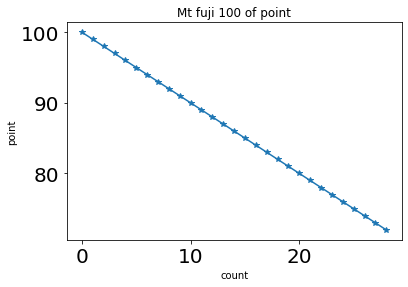

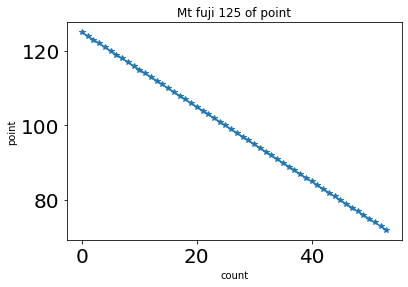

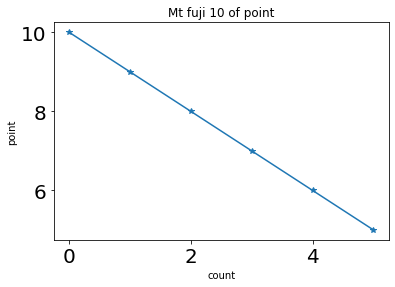

In [150]:
plt.title('Mt fuji 100 of point')
plt.xlabel("count")
plt.ylabel("point")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(log[100], marker='*')
plt.show()

plt.title('Mt fuji 125 of point')
plt.xlabel("count")
plt.ylabel("point")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(log[125], marker='*')
plt.show()

plt.title('Mt fuji 10 of point')
plt.xlabel("count")
plt.ylabel("point")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(log[10], marker='*')
plt.show()

【問題7】（アドバンス問題）ハイパーパラメータの変更

今いる地点を入力してください:136


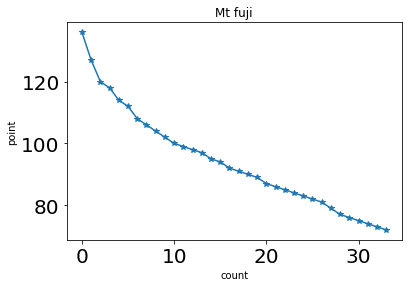

In [142]:
point = int(input('今いる地点を入力してください:'))
result5 = compute_grad4(point, alpha=0.05)
plt.title('Mt fuji')
plt.xlabel("count")
plt.ylabel("point")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(result5, marker='*')
plt.show()

今いる地点を入力してください:136


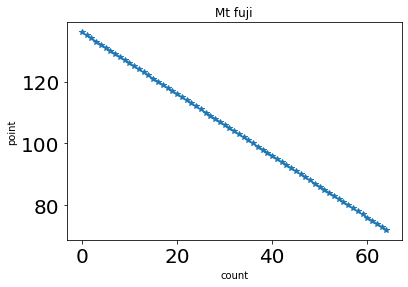

In [143]:
point = int(input('今いる地点を入力してください:'))
result6 = compute_grad4(point, alpha=0.0001)
plt.title('Mt fuji')
plt.xlabel("count")
plt.ylabel("point")
plt.tick_params(labelsize=20) # 軸の値に関する設定を行う
plt.plot(result6, marker='*')
plt.show()